In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# Step 1: Create and populate the SQLite database
db_file = "sales_data.db"
if not os.path.exists(db_file):
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()

    # Create Sales Table
    cursor.execute('''
           CREATE TABLE sales(
                id INTEGER PRIMARY KEY,
                product TEXT NOT NULL,
                quantity INTEGER NOT NULL,
                price REAL NOT NULL
          )
    ''')

    # Insert sample sales data
    sample_data = [
          ('Apple', 10, 0.5),
          ('Banana', 5, 0.3),
          ('Orange', 8, 0.6),
          ('Apple', 15, 0.5),
          ('Banana', 7, 0.3),
          ('Orange', 10, 0.6),
    ]
    cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)
    conn.commit()
    conn.close()
    print("Database created and sample data inserted.")
else:
    print("Database already exists.")
    
    

Database created and sample data inserted.


In [4]:
# Step 2: Connect to the database 
conn = sqlite3.connect(db_file)

In [5]:
#Step 3 : Run SQL query
query = """
        SELECT 
             product,
             SUM(quantity) AS total_qty,
             SUM(quantity * price) AS revenue 
        FROM sales
        GROUP BY product 
"""
df = pd.read_sql_query(query, conn)

In [6]:
# Step 4: Display results
print("Sales Summary : ")
print(df)

Sales Summary : 
  product  total_qty  revenue
0   Apple         25     12.5
1  Banana         12      3.6
2  Orange         18     10.8


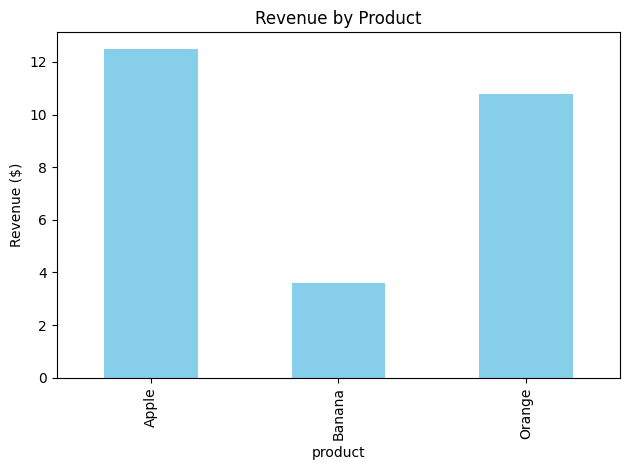

In [7]:
# Step 5 : Plot bar Chart 
df.plot(kind= 'bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()


In [8]:
# Step 6 : Close the connection
conn.close()